<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project: Data Analysis of Singapore Weather in relation to Dengue Cases

## Contents:
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Choose Data](#Choose-Data)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization and Analysis](#Data-Visualization-and-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#References)

## Background

Countries that are located near the equator tend to have tropical climates, which can provide suitable conditions for the transmission of dengue fever. Mosquitoes that transmit dengue, Aedes aegypti and Aedes albopictus, prefer to breed in areas with high temperatures and humidity, and these conditions are more prevalent in tropical regions.  For example, warm and humid weather can create ideal conditions for mosquito breeding and increase the risk of dengue transmission. On the other hand, dry and cool weather can inhibit the development of mosquitoes and reduce the risk of dengue transmission. As a result, dengue is more common in countries with tropical climates. 

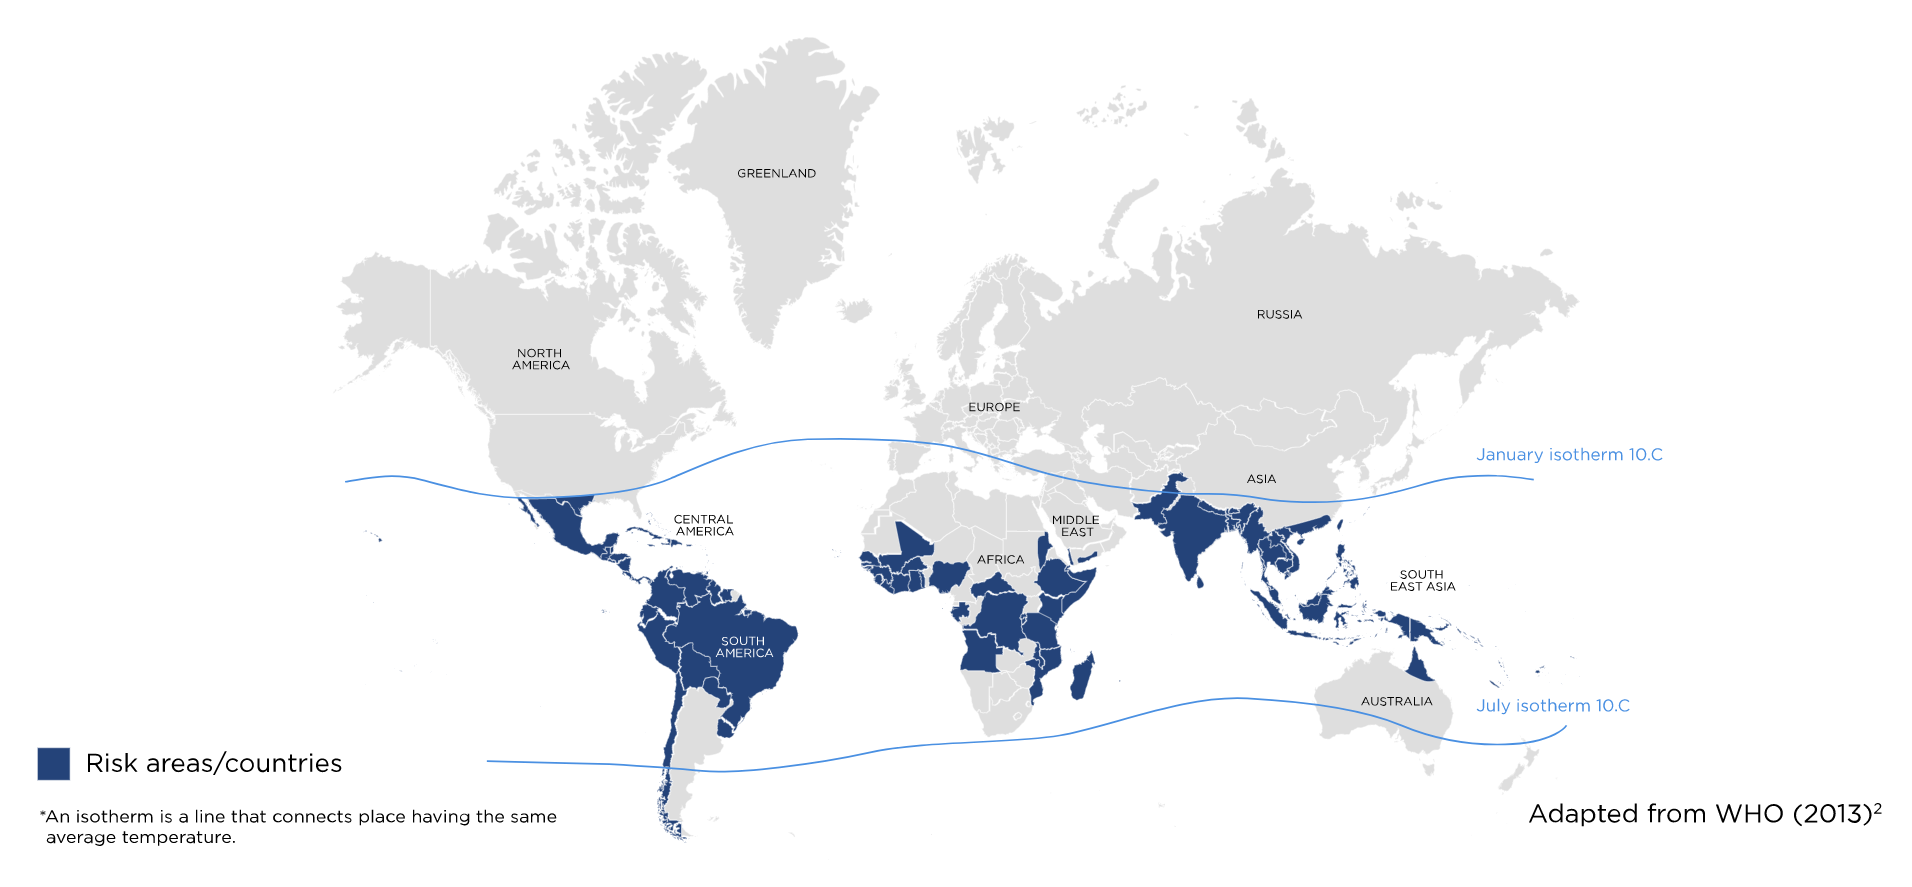
([Picture Source](https://bewareofthebugs.com/diseases/dengue-fever/))

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are other metrics of climate such as sun shine duration, wind speed, cloud cover etc. In this project, we will look into the data sets based on the three core metrics - rainfall, temperature and humidity which are believed to responsible in relation to the increase of dengue cases in the country. 

However, it's important to note that weather is just one of several factors that can influence the transmission of dengue fever. Other factors, such as the presence of the dengue virus, the density of mosquito breeding sites, and the effectiveness of control measures, can also impact the transmission of the disease.

All the datasets used in the project come from [data.gov.sg](data.gov.sg).


## Problem Statement

*To provide insights using weather and dengue case data for National Environment Agency's dengue awareness campaigns.* 

## Outside Research

#### The Dengue "Emergency" in Singapore ([Source](https://edition.cnn.com/2022/06/06/asia/health-dengue-singapore-emergency-climate-heat-intl-hnk/index.html)) :

Singapore says it is facing a dengue “emergency” as it grapples with an outbreak of the seasonal disease that has come unusually early this year.

The Southeast Asian city-state has already exceeded 11,000 cases – far beyond the 5,258 it reported throughout 2021 – and that was before June 1, when its peak dengue season traditionally begins. Dengue is not a pleasant disease. It causes flu-like symptoms such as high fever, severe headaches and body pains. In extreme cases, bleeding, breathing difficulties, organ failure and even death can occur.

Experts are warning that it’s a grim figure not only for Singapore – whose tropical climate is a natural breeding ground for the Aedes mosquitoes that carry the virus – but also for the rest of the world. That’s because changes in the global climate mean such outbreaks are likely to become more common and widespread in the coming years. 

Singapore launched a comprehensive nationwide programme in 1968 targeting the Aedes mosquito, the main mosquito vector of dengue. This control programme combines environmental management, source reduction, public health education and law enforcement. Since then, the number of homes found to be breeding Aedes mosquito fell sharply and remains low. ([Source](https://www.ncid.sg/Health-Professionals/Articles/Pages/Rise-in-dengue-cases-underscores-need-for-constant-vigilance.aspx))

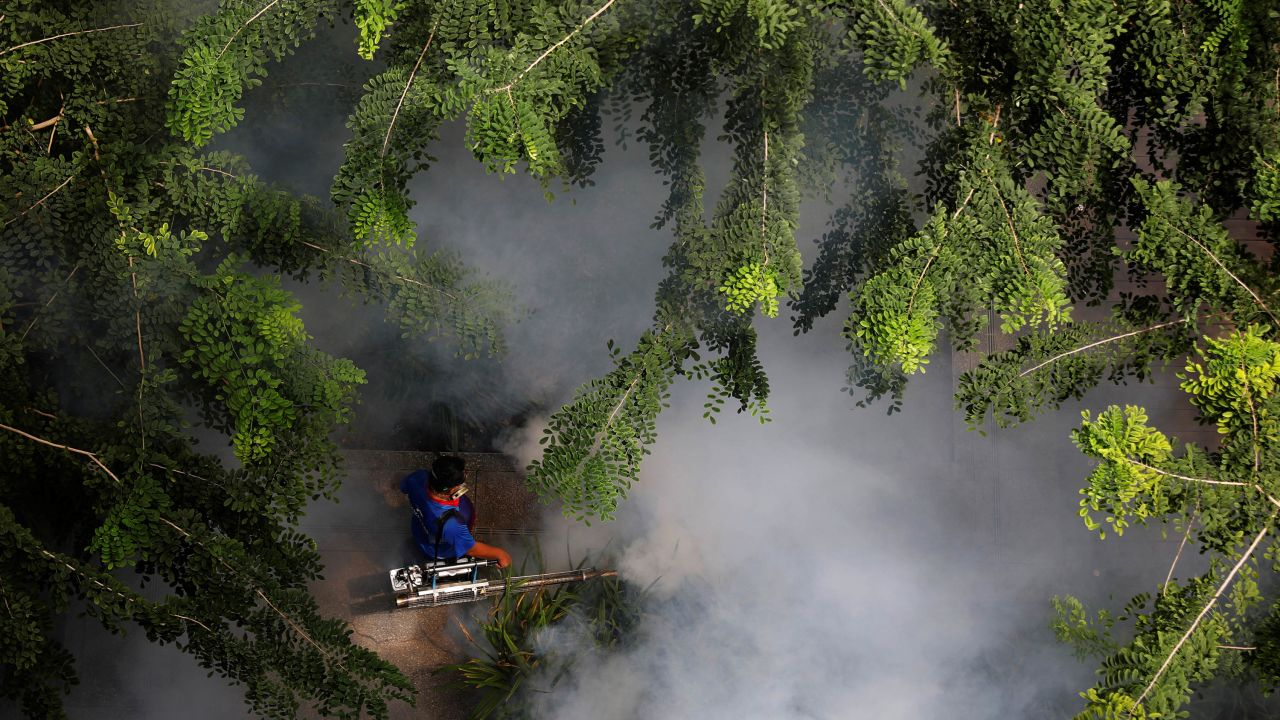
([Picture Source](https://edition.cnn.com/2022/06/06/asia/health-dengue-singapore-emergency-climate-heat-intl-hnk/index.html))

- Comments: 

It is often read in the local news articles that dengue is a real public health problem in Singapore. Other than NEA, many research institutes and healthcare organisations are working on improving the situation caused by dengue and related virus. It arouses my interest to take a deep dive into the dengue case data and hopefully derive some helpful insights from it. 

#### "Impact of extreme weather on dengue fever infection in four Asian countries" ([Source](https://www.sciencedirect.com/science/article/pii/S0160412022004457)) :

This study evaluated the association between extreme temperature, rainfall, and dengue fever infection risk by using the data from four South and Southeast Asian countries from 2012 to 2020. The results showed that the risk of dengue fever infection was associated with extreme temperatures, and there was a higher risk at lag 1 and 2 weeks; on the other hand, an extreme rainfall was associated with a lower risk of dengue fever infection.

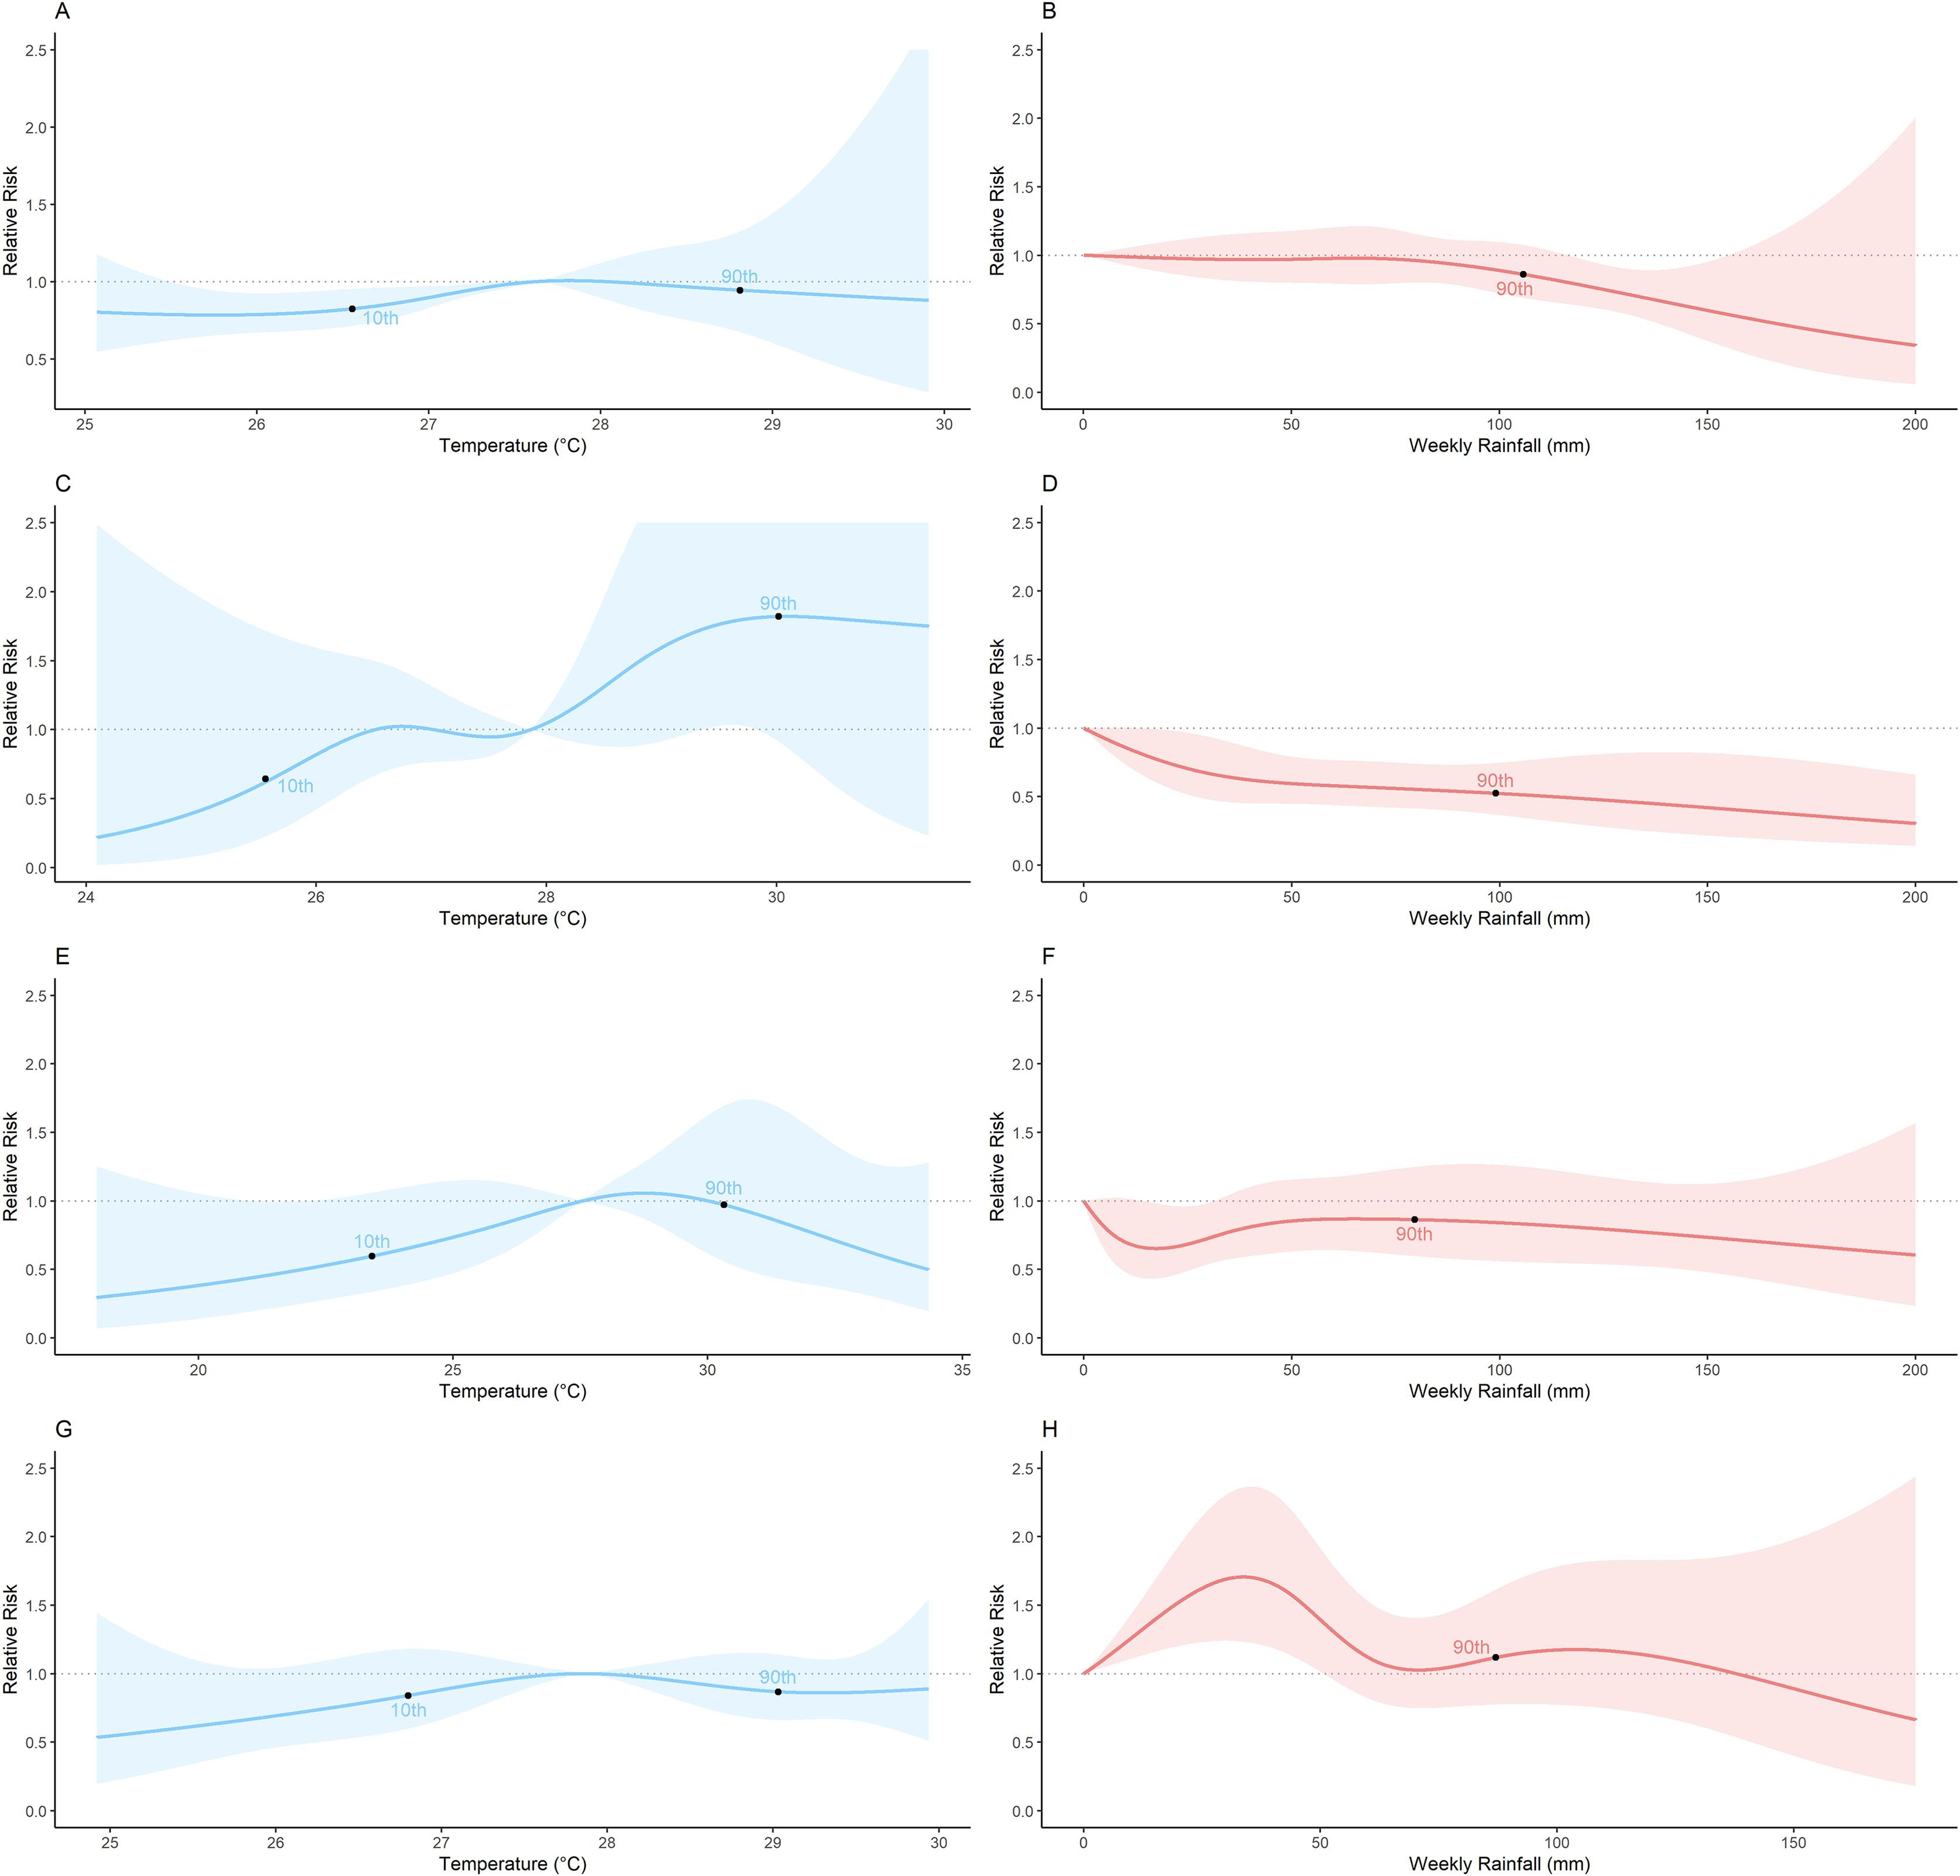

- Comments:

Many other research ([Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3854883/)) ([Source](https://www.eco-business.com/news/weather-factors-key-to-predicting-dengue-outbreaks/)) have shown the probable relation between weather metrics and the risk of dengue infection. However, not all are able to provide detailed data support for identifying the linear relation between temperature and rainfall specifically. With the results and understanding of this study, I am more confident with relevance of the weather metrics I decide to look into. 

#### NEA Launches National Dengue Prevention Campaign 2022 Early To Urge Immediate Action Against Dengue ([Source](https://www.nea.gov.sg/media/news/news/index/nea-launches-national-dengue-prevention-campaign-2022-early-to-urge-immediate-action-against-dengue)) :

The National Environment Agency (NEA) launched the annual National Dengue Prevention Campaign today, ahead of the traditional peak dengue season from June to October. At the event, Mr. Desmond Tan, Minister of State for Sustainability and the Environment, urged members of the public and all stakeholders to take urgent collective action to reduce mosquito breeding habitats in the fight against dengue, to avert a major dengue outbreak in 2022.

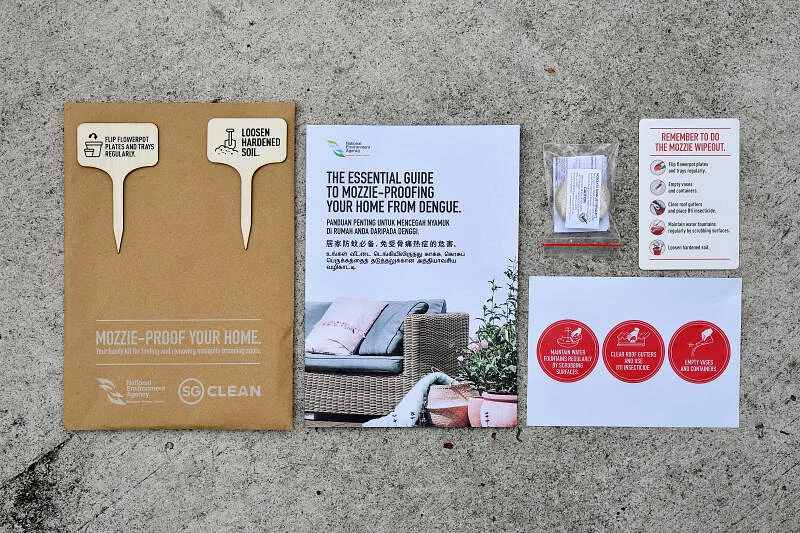
([Picture Source](https://www.straitstimes.com/singapore/nea-kicks-off-year-end-dengue-prevention-campaign-by-distributing-toolkits-to-residents))

## Choose Data

The following datasets are going to be used in this project:

* [Monthly Total Rainfall 1982-2022](./data/rainfall-monthly-total.csv):
    - The total monthly rainfall recorded at the Changi Climate Station.
* [Monthly Number of Rain Days 1982-2022](./data/rainfall-monthly-number-of-rain-days.csv): 
    - The number of rain days (day with rainfall amount of 0.2mm or more) in a month recorded at the Changi Climate Station.
* [Relative Humidity 1982-2022](https://data.gov.sg/dataset/relative-humidity-monthly-mean): 
    - Monthly mean of relative humidity. Percentages are expressed as a value over 100.
* [Surface Air Temperature 1982-2022](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum): 
    - Monthly mean daily minimum temperature.
* [Weekly Number of Dengue and DHF Cases 2014-2018](https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases) 
    - Weekly reported number of dengue and related virus cases.

## Data Import and Cleaning

#### Import all libraries: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
pd.options.mode.chained_assignment = None

#### Read and review respective weather data: 
1. Display the data.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
7. Rename Columns.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.

In [3]:
df_rainfall_mth_total = pd.read_csv('../data/rainfall-monthly-total.csv')
df_rainfall_mth_total.head(5)

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [4]:
df_rainfall_mth_total.shape

(488, 2)

In [5]:
df_rainfall_mth_num = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
df_rainfall_mth_num.head(5)

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [6]:
df_rainfall_mth_num.shape

(488, 2)

In [7]:
df_rainfall_mth_num.tail(5)

,month,no_of_rainy_days
483,2022-04,18
484,2022-05,12
485,2022-06,17
486,2022-07,16
487,2022-08,15


In [8]:
df_humidity_mth_mean = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
df_humidity_mth_mean.head(5)

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [9]:
df_humidity_mth_mean.shape

(491, 2)

In [10]:
df_humidity_mth_mean.tail(5)

,month,mean_rh
486,2022-07,76.8
487,2022-08,77.4
488,2022-09,76.9
489,2022-10,78.7
490,2022-11,79.9


In [11]:
df_temp_mth_min = pd.read_csv('../data/surface-air-temperature-monthly-mean-daily-minimum.csv')
df_temp_mth_min.head(5)

,month,temp_mean_daily_min
0,1982-01,23.3
1,1982-02,23.9
2,1982-03,24.3
3,1982-04,24.3
4,1982-05,25.2


In [12]:
df_temp_mth_min.shape

(491, 2)

In [13]:
df_merge1 = pd.merge(left = df_rainfall_mth_total, right = df_rainfall_mth_num, how = 'right', on = 'month')
df_merge1.head(5)

,month,total_rainfall,no_of_rainy_days
0,1982-01,107.1,10
1,1982-02,27.8,5
2,1982-03,160.8,11
3,1982-04,157.0,14
4,1982-05,102.2,10


In [14]:
df_merge2 = pd.merge(left = df_humidity_mth_mean, right = df_temp_mth_min, how = 'right', on = 'month')
df_merge2.head(5)

,month,mean_rh,temp_mean_daily_min
0,1982-01,81.2,23.3
1,1982-02,79.5,23.9
2,1982-03,82.3,24.3
3,1982-04,85.9,24.3
4,1982-05,83.2,25.2


In [15]:
df_weather = pd.merge(left = df_merge1, right = df_merge2, how = 'left',on = 'month')
df_weather.head(5)

,month,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min
0,1982-01,107.1,10,81.2,23.3
1,1982-02,27.8,5,79.5,23.9
2,1982-03,160.8,11,82.3,24.3
3,1982-04,157.0,14,85.9,24.3
4,1982-05,102.2,10,83.2,25.2


#### Time values will be better analysed in `yr` and `mth`. Create new columns splitting the `month` data. Rename column name `month` to `yr_mth` for better clarify.

In [16]:
df_weather['month']= pd.to_datetime(df_weather['month'],format='%Y-%m')

In [17]:
df_weather['yr']= df_weather['month'].dt.year
df_weather['mth']= df_weather['month'].dt.month

In [18]:
df_weather = df_weather.drop(columns = ['month'])

In [19]:
df_weather.head(5)

,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,yr,mth
0,107.1,10,81.2,23.3,1982,1
1,27.8,5,79.5,23.9,1982,2
2,160.8,11,82.3,24.3,1982,3
3,157.0,14,85.9,24.3,1982,4
4,102.2,10,83.2,25.2,1982,5


#### Review the final combined dataframe. Identify missing values, anomalities, and make sure datatypes are ready for analysis.

In [20]:
df_weather.isnull().sum()

total_rainfall         0
no_of_rainy_days       0
mean_rh                0
temp_mean_daily_min    0
yr                     0
mth                    0
dtype: int64

In [21]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_rainfall       488 non-null    float64
 1   no_of_rainy_days     488 non-null    int64  
 2   mean_rh              488 non-null    float64
 3   temp_mean_daily_min  488 non-null    float64
 4   yr                   488 non-null    int64  
 5   mth                  488 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 26.7 KB


In [22]:
df_weather['no_of_rainy_days'] = df_weather['no_of_rainy_days'].astype(float)

In [23]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_rainfall       488 non-null    float64
 1   no_of_rainy_days     488 non-null    float64
 2   mean_rh              488 non-null    float64
 3   temp_mean_daily_min  488 non-null    float64
 4   yr                   488 non-null    int64  
 5   mth                  488 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 26.7 KB


#### Read weekly dengue case data:

In [24]:
df_dengue = pd.read_csv('../data/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv')
df_dengue

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


#### Check and drop 'DHF' case numbers:

In [25]:
df_dengue.groupby('type_dengue').sum()

,year,eweek,number
type_dengue,,,
DHF,534240,7155,99.0
Dengue,534240,7155,48656.0


In [26]:
df_dengue = df_dengue.loc[::2]

In [27]:
df_dengue.dtypes

year             int64
eweek            int64
type_dengue     object
number         float64
dtype: object

#### Change from week number to month (to align with the weather data):

In [28]:
df_dengue['mth'] = round(df_dengue['eweek']/(53/12))

In [29]:
df_dengue['mth'] = df_dengue['mth'].astype(int)

In [30]:
df_dengue.drop(columns=['type_dengue','eweek'],inplace=True)

In [31]:
df_dengue['mth'] = df_dengue['mth'].map(lambda x: 1 if x == 0 else x)

In [32]:
df_dengue.rename(columns={'year': 'yr'},inplace=True)

In [33]:
df_dengue= df_dengue.groupby(['yr','mth']).sum()

In [34]:
df_weather = df_weather.groupby(['yr','mth']).sum()

#### Merge weather data and dengue case data into one final dataframe 
(weather data rows are truncated to the period of 2014-2018 only, corresponding to the rows of dengue case data):

In [35]:
df_merge = pd.merge(df_weather, df_dengue, how='right', on=['yr','mth'])

In [36]:
df_merge.head(3)

total_rainfall  no_of_rainy_days  mean_rh  temp_mean_daily_min  \
yr   mth                                                                   
2014 1              75.4               5.0     78.5                 24.0   
     2               0.2               1.0     74.5                 24.5   
     3              66.0               6.0     76.0                 25.1   

          number  
yr   mth          
2014 1    2159.0  
     2    1181.0  
     3     919.0

#### Check for missing values and clean up the final dataframe:

In [37]:
df_merge.isnull().sum()

total_rainfall         0
no_of_rainy_days       0
mean_rh                0
temp_mean_daily_min    0
number                 0
dtype: int64

In [38]:
df_merge.fillna(method='ffill').head(3)

total_rainfall  no_of_rainy_days  mean_rh  temp_mean_daily_min  \
yr   mth                                                                   
2014 1              75.4               5.0     78.5                 24.0   
     2               0.2               1.0     74.5                 24.5   
     3              66.0               6.0     76.0                 25.1   

          number  
yr   mth          
2014 1    2159.0  
     2    1181.0  
     3     919.0

In [39]:
df_final = df_merge.reset_index()

In [40]:
df_final.head(3)

,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
0,2014,1,75.4,5.0,78.5,24.0,2159.0
1,2014,2,0.2,1.0,74.5,24.5,1181.0
2,2014,3,66.0,6.0,76.0,25.1,919.0


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   60 non-null     int64  
 1   mth                  60 non-null     int64  
 2   total_rainfall       60 non-null     float64
 3   no_of_rainy_days     60 non-null     float64
 4   mean_rh              60 non-null     float64
 5   temp_mean_daily_min  60 non-null     float64
 6   number               60 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.4 KB


#### Save the merged dataframe as 'csv' file into 'data' folder:

In [42]:
df_final.to_csv('../data/final.csv')

## Data Dictionary

Here's a data dictionary for a quick overview of features/variables/columns, alongside data types and descriptions. 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|yr (2014-2018)|int|final|Year column indicating the timeframe| 
|mth (1-12)|int|final|Month column indicating the timeframe| 
|total_rainfall|float|final|Total rainfall in mm in a month| 
|no_of_rainy_days|float|final|The number of rain days (day with rainfall amount of 0.2mm or more) in a month recorded|
|mean_rh|float|final|Monthly mean of relative humidity, percentages are expressed as a value over 100.|
|temp_mean_daily_min|float|final|Monthly mean daily minimum temperature|
|number|float|final|Number of reported dengue cases over a month|

## Exploratory Data Analysis

#### Coding Challenges

1. Manually calculate mean:

In [43]:
def mean_of_val(list_of_val):
    sum_of_val = 0
    for i in list_of_val:
        sum_of_val += i
    return sum_of_val/len(list_of_val)

In [44]:
mean_of_val([1,-2,3,500,45])

109.4

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.

In [45]:
def std_dev(list_of_val):
    sq_error = 0
    for i in range(len(list_of_val)):
        sq_error += (list_of_val[i] - mean_of_val(list_of_val))**2
    return (sq_error/(len(list_of_val)))**0.5

In [46]:
std_dev([1,-2,3,500,45])

196.0597867998433

#### Create the new dictionary manually with numeric columns as keys and the standard deviations of the column values as values:

In [47]:
sd={}

sd_keys = ['total_rainfall','no_of_rainy_days','mean_rh','temp_mean_daily_min']

sd['total_rainfall'] = round(std_dev(df_final['total_rainfall'].tolist()),1)
sd['no_of_rainy_days'] = round(std_dev(df_final['no_of_rainy_days'].tolist()),1)
sd['mean_rh'] = round(std_dev(df_final['mean_rh'].tolist()),1)
sd['temp_mean_daily_min'] = round(std_dev(df_final['temp_mean_daily_min'].tolist()),1)
sd['number'] = round(std_dev(df_final['number'].tolist()),1)

In [48]:
sd

{'total_rainfall': 79.1,
 'no_of_rainy_days': 5.7,
 'mean_rh': 3.3,
 'temp_mean_daily_min': 0.7,
 'number': 730.6}

#### Summary Statistics:

In [49]:
df_final[['total_rainfall','no_of_rainy_days','mean_rh','temp_mean_daily_min','number']].describe().round()

,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
count,60.0,60.0,60.0,60.0,60.0
mean,142.0,14.0,79.0,25.0,811.0
std,80.0,6.0,3.0,1.0,737.0
min,0.0,1.0,72.0,24.0,117.0
25%,84.0,10.0,77.0,25.0,265.0
50%,126.0,14.0,78.0,26.0,535.0
75%,186.0,18.0,80.0,26.0,1049.0
max,371.0,27.0,87.0,27.0,3366.0


#### Analysis:

- From the summary above, it is observed in the period of 2014-2018 on a monthly basis, the average total rainfall is 142mm, the average number of rainy days is 14, average relative humidity is 79%, average lowest daily temperature is 25.0°C. The average number of dengue cases per month is 811.
- Daily minimum temperature and relative humidity is spread within a narrow range (with a low standard deviation as compared to the mean). 
- Whereas the fluctuations in the total rainfall and number of rainy days are quite significant across the period of study, we notice a unusally high standard deviation of dengue case numbers resulting from a widely scattered distribution of numbers (ranging from 117 cases to 3366 cases in a month). We will need to look into the data more closely with the help of visualisations. 

#### Investigate trends in the rainfall data:

In [50]:
df_2014 = df_final[df_final['yr']==2014]
df_2015 = df_final[df_final['yr']==2015]
df_2016 = df_final[df_final['yr']==2016]
df_2017 = df_final[df_final['yr']==2017]
df_2018 = df_final[df_final['yr']==2018]

In [51]:
print('Which month has the highest total rainfall in 2014:')
df_2014.sort_values(by='total_rainfall',ascending=False).head(1)

Which month has the highest total rainfall in 2014:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
10,2014,11,250.8,23.0,82.4,24.8,700.0


In [52]:
print('Which month has the highest number of rainy days in 2014:')
df_2014.sort_values(by='no_of_rainy_days',ascending=False).head(1)

Which month has the highest number of rainy days in 2014:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
10,2014,11,250.8,23.0,82.4,24.8,700.0


In [53]:
print('Which month has the lowest total rainfall in 2014:')
df_2014.sort_values(by='total_rainfall',ascending=False).tail(1)

Which month has the lowest total rainfall in 2014:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
1,2014,2,0.2,1.0,74.5,24.5,1181.0


In [54]:
print('Which month has the lowest number of rainy days in 2014:')
df_2014.sort_values(by='no_of_rainy_days',ascending=False).tail(1)

Which month has the lowest number of rainy days in 2014:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
1,2014,2,0.2,1.0,74.5,24.5,1181.0


In [55]:
print('Which month has the highest total rainfall in 2015:')
df_2015.sort_values(by='total_rainfall',ascending=False).head(1)

Which month has the highest total rainfall in 2015:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
23,2015,12,302.3,19.0,81.1,25.0,824.0


In [56]:
print('Which month has the highest number of rainy days in 2015:')
df_2015.sort_values(by='no_of_rainy_days',ascending=False).head(1)

Which month has the highest number of rainy days in 2015:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
23,2015,12,302.3,19.0,81.1,25.0,824.0


In [57]:
print('Which month has the lowest total rainfall in 2015:')
df_2015.sort_values(by='total_rainfall',ascending=False).tail(1)

Which month has the lowest total rainfall in 2015:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
13,2015,2,18.8,6.0,75.4,24.4,660.0


In [58]:
print('Which month has the lowest number of rainy days in 2015:')
df_2015.sort_values(by='no_of_rainy_days',ascending=False).tail(1)

Which month has the lowest number of rainy days in 2015:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
14,2015,3,84.4,5.0,75.8,25.5,463.0


In [59]:
print('Which month has the highest total rainfall in 2016:')
df_2016.sort_values(by='total_rainfall',ascending=False).head(1)

Which month has the highest total rainfall in 2016:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
35,2016,12,292.6,23.0,72.8,24.7,134.0


In [60]:
print('Which month has the highest number of rainy days in 2016:')
df_2016.sort_values(by='no_of_rainy_days',ascending=False).head(1)

Which month has the highest number of rainy days in 2016:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
35,2016,12,292.6,23.0,72.8,24.7,134.0


In [61]:
print('Which month has the lowest total rainfall in 2016:')
df_2016.sort_values(by='total_rainfall',ascending=False).tail(1)

Which month has the lowest total rainfall in 2016:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
26,2016,3,6.2,6.0,74.7,26.6,1187.0


In [62]:
print('Which month has the lowest number of rainy days in 2016:')
df_2016.sort_values(by='no_of_rainy_days',ascending=False).tail(1)

Which month has the lowest number of rainy days in 2016:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
26,2016,3,6.2,6.0,74.7,26.6,1187.0


In [63]:
print('Which month has the highest total rainfall in 2017:')
df_2017.sort_values(by='total_rainfall',ascending=False).head(1)

Which month has the highest total rainfall in 2017:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
47,2017,12,371.2,23.0,85.2,24.6,117.0


In [64]:
print('Which month has the highest number of rainy days in 2017:')
df_2017.sort_values(by='no_of_rainy_days',ascending=False).head(1)

Which month has the highest number of rainy days in 2017:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
46,2017,11,268.6,24.0,86.3,24.6,134.0


In [65]:
print('Which month has the lowest total rainfall in 2017:')
df_2017.sort_values(by='total_rainfall',ascending=False).tail(1)

Which month has the lowest total rainfall in 2017:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
42,2017,7,79.6,9.0,79.6,26.0,283.0


In [66]:
print('Which month has the lowest number of rainy days in 2017:')
df_2017.sort_values(by='no_of_rainy_days',ascending=False).tail(1)

Which month has the lowest number of rainy days in 2017:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
42,2017,7,79.6,9.0,79.6,26.0,283.0


In [67]:
print('Which month has the highest total rainfall in 2018:')
df_2018.sort_values(by='total_rainfall',ascending=False).head(1)

Which month has the highest total rainfall in 2018:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
48,2018,1,287.0,25.0,86.6,24.0,348.0


In [68]:
print('Which month has the highest number of rainy days in 2018:')
df_2018.sort_values(by='no_of_rainy_days',ascending=False).head(1)

Which month has the highest number of rainy days in 2018:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
58,2018,11,169.6,27.0,83.2,24.6,426.0


In [69]:
print('Which month has the lowest total rainfall in 2018:')
df_2018.sort_values(by='total_rainfall',ascending=False).tail(1)

Which month has the lowest total rainfall in 2018:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
49,2018,2,14.8,5.0,77.2,24.8,191.0


In [70]:
print('Which month has the lowest number of rainy days in 2018:')
df_2018.sort_values(by='no_of_rainy_days',ascending=False).tail(1)

Which month has the lowest number of rainy days in 2018:


,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
49,2018,2,14.8,5.0,77.2,24.8,191.0


In [71]:
print('Which year has the highest number of rainy days in the date range of analysis:')
df_final.groupby('yr')['no_of_rainy_days'].sum().sort_values(ascending=False).head(1)

Which year has the highest number of rainy days in the date range of analysis:


yr
2017    204.0
Name: no_of_rainy_days, dtype: float64

In [72]:
print('Which year has the lowest number of rainy days in the date range of analysis:')
df_final.groupby('yr')['no_of_rainy_days'].sum().sort_values(ascending=False).tail(1)

Which year has the lowest number of rainy days in the date range of analysis:


yr
2015    125.0
Name: no_of_rainy_days, dtype: float64

#### Analysis:

- In general, we observe a repeated pattern of distribution in total rainfall over the year for the period of 2014-2018. The lowest total rainfall usually happens in Q1 and the opposite usually happens in Q4. There are however exceptions. For instance, the lowest rainfall month in 2017 is in July.
- It is likely the total rainfall is related to the number of rainy days. If a month has the highest total number rainy days in that year, it is very possible the same month also has the highest total rainfall. The opposite is seems true as well. But there are outliners. In 2018, November has the highest total number of rainy days of 27, yet January outperforms November in terms of total rainfall.

## Data Visualization and Analysis

Text(0.5, 0, 'Month')

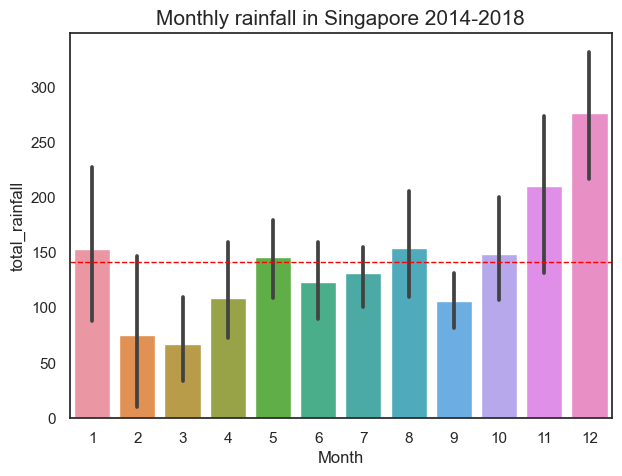

In [165]:
plt.figure(figsize = (7, 5))
sns.set(style="white")
sns.barplot(data=df_final, x='mth',y='total_rainfall')
plt.axhline(y=df_merge['total_rainfall'].mean() , color='red', linestyle='--', linewidth=1)
plt.title('Monthly rainfall in Singapore 2014-2018', fontsize=15)
plt.xlabel('Month')

#### Analysis:

- The coloured bars represent the average total rainfall of that month and the black strokes are the standard deviation. The long black strokes in this graph suggest the rainfall data within each month are widely scattered, far away from the mean value.
- If we look into the month by month values, the general trend for the average rainfall amount is increasing from Jan to Dec. Lowest is at 50mm for Feb-Mar period and highest is 280mm in Dec. 
- The overall average rainfall amount in a month is about 150mm. As a reference, that value for UK is 96mm and for US is 64mm (in 2022). Singapore rains as much as UK and US combined!

In [ ]:
plt.figure(figsize = (7, 4))
sns.set(style="white")
sns.barplot(data=df_final, x='mth',y='total_rainfall')
plt.title('Monthly rainfall in Singapore 2014-2018', fontsize=15)

Text(0.5, 1.0, 'Summary of total monthly rainfall in Singapore 2014-2018')

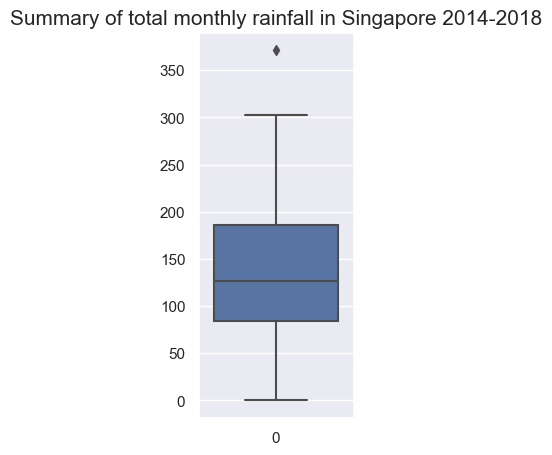

In [72]:
sns.set(rc={'figure.figsize':(2,5)})
sns.boxplot(data=df_final['total_rainfall'])
plt.title('Summary of total monthly rainfall in Singapore 2014-2018',fontsize=15)

In [73]:
df_final.loc[df_final['total_rainfall']>= 350]

,yr,mth,total_rainfall,no_of_rainy_days,mean_rh,temp_mean_daily_min,number
47,2017,12,371.2,23.0,85.2,24.6,117.0


#### Analysis:

- From the boxplot of total rainfall 2014-2018, it is observed that the median value is around 125mm. 1st quartile value is around 80mm and 3rd quartile value is around 190mm. 
- The range of monthly total rainfall is 0-350mm with an outlinear of 371.2mm in December of 2017.

Text(0.5, 1.0, 'Distribution of monthly rainfall in Singapore 2014-2018')

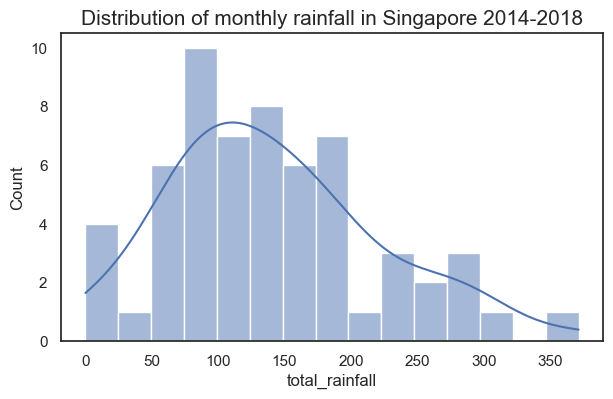

In [111]:
plt.figure(figsize = (7, 4))
sns.set(style="white")
sns.histplot(data=df_final, x='total_rainfall', bins =15, kde=True)
plt.title('Distribution of monthly rainfall in Singapore 2014-2018', fontsize=15)

#### Analysis:

- The number of bins for the above histogram is set at 15, the bin width is about 25mm.
- It is oberved the distribution of monthly rainfall in Singapore is skewed right, indicating the mode value (the value with the highest number of occurances) lower than the mean. It means that Singapore has more months with lower than 142mm rainfall.
- It is most frequent to see monthly rainfall amount in between 75mm and 100mm. 
- The KDE line is not able to pass through all the bars smoothly.
- Note that the outlinear (371.2mm in December of 2017) has been included towards the 'right tail' in the graph.

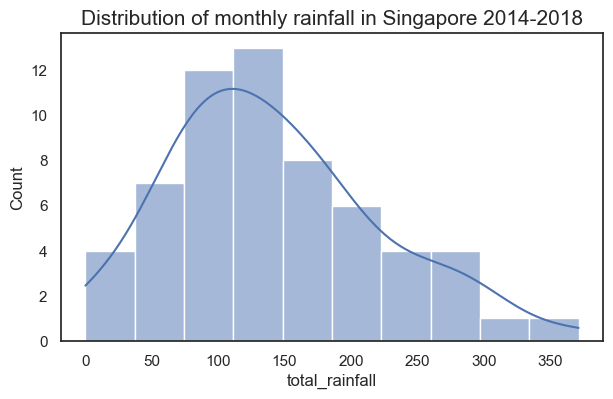

In [73]:
plt.figure(figsize = (7, 4))
sns.set(style="white")
sns.histplot(data=df_final, x='total_rainfall', bins =10, kde=True)
plt.title('Distribution of monthly rainfall in Singapore 2014-2018', fontsize=15)
plt.savefig('hist_rainfall.png', bbox_inches='tight')

#### Analysis:

- As the number of bins is reduced to 10, the bin width is about 40mm.
- It is oberved the distribution of monthly rainfall in Singapore is skewed right, indicating the mode value (the value with the highest number of occurances) lower than the mean. It means that Singapore has more months with lower than 142mm rainfall.
- However, the most frequently seen monthly rainfall amount is now changed to in between 110-150mm. The reason is that the re-slicing of the bins has divided the counts of 75-100mm into the new bins before and after. Now more counts are taken into the 110-150mm bin.
- It is satisfying to see the KDE line passing through most of the bar tips smoothly. 

[Text(0.5, 1.0, 'Distribution of monthly rainfall in relation to number of rainy days in Singapore 2014-2018')]

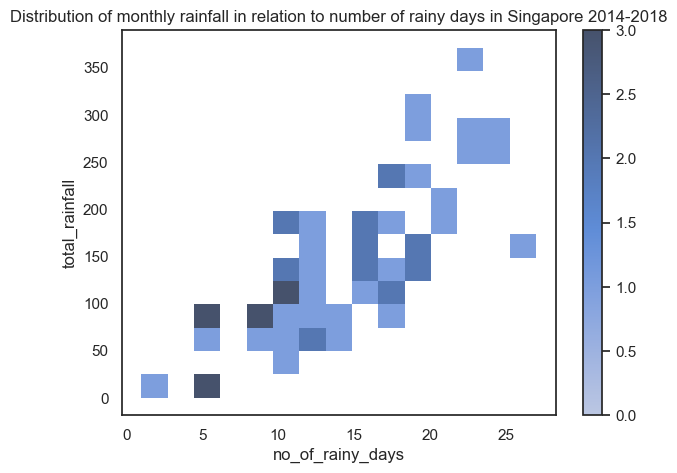

In [74]:
plt.figure(figsize = (7, 5))
sns.set(style="white")
sns.histplot(data=df_final, y='total_rainfall',x='no_of_rainy_days',bins =15, shrink=0.2, cbar=True).set(title= 'Distribution of monthly rainfall in relation to number of rainy days in Singapore 2014-2018')

## Analysis:

- When ploting a histogram with number of rainy days against the total rainfall on a monthly basis, it turns into a heatmap indicating the correlation between the two metrics. Darker grid indicates more occurances of the event.
- A significant linear correlation is observed from the heatmap, with the correlation seemingly stronger when both values are lower.

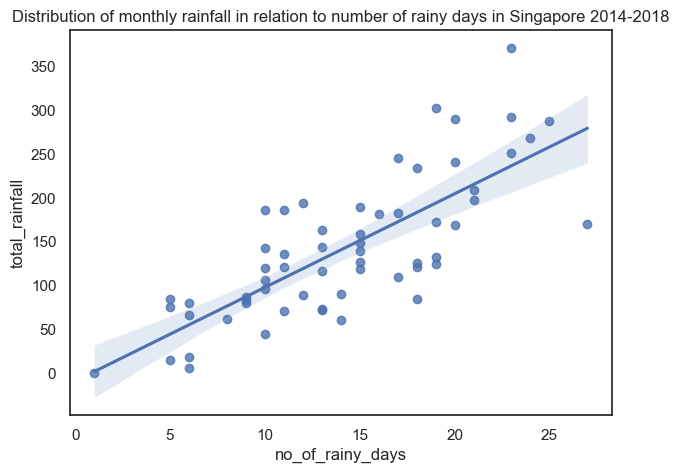

In [75]:
plt.figure(figsize = (7, 5))
sns.set(style="white")
sns.regplot(data=df_final, y='total_rainfall',x='no_of_rainy_days',fit_reg =True).set(title= 'Distribution of monthly rainfall in relation to number of rainy days in Singapore 2014-2018')
plt.savefig('rainfall_days', bbox_inches='tight')

## Analysis:

- The scatterplot of total rainfall against the number of rainy days shows a significant positive correlation. It makes sense to observe a higher rainfall amount during a month with more rainy days.

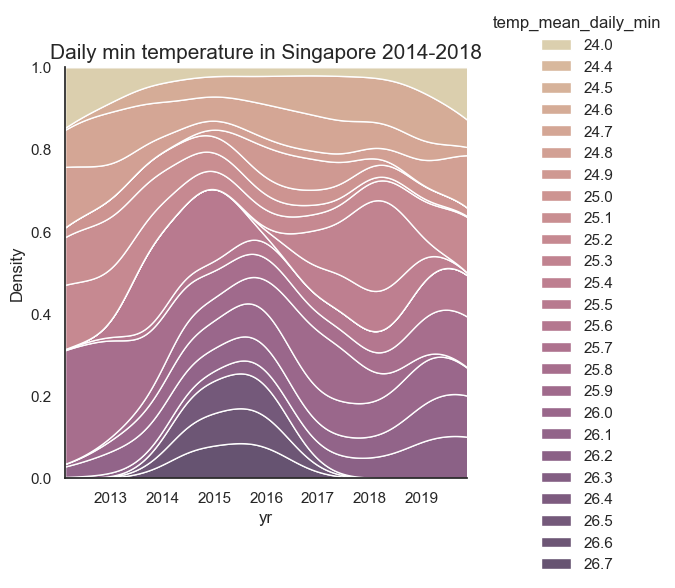

In [76]:
sns.displot(data=df_final, x='yr', hue='temp_mean_daily_min', kind='kde',multiple='fill', clip=(0,None), palette='ch:rot=.6, hue=1,light=.75', warn_singular=False)
plt.title('Daily min temperature in Singapore 2014-2018', fontsize=15)
plt.savefig('map_temp.png',bbox_inches='tight')

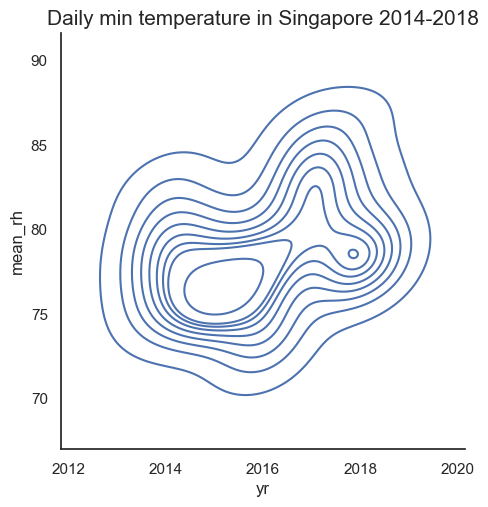

In [77]:
sns.displot(data=df_final, x='yr', y='mean_rh', kind='kde',clip=(0,None), warn_singular=False)
plt.title('Daily min temperature in Singapore 2014-2018', fontsize=15)
plt.savefig('map_rh.png',bbox_inches='tight')

#### For easy reference, let's put temperature and humidity data into one plot with two y-axis:

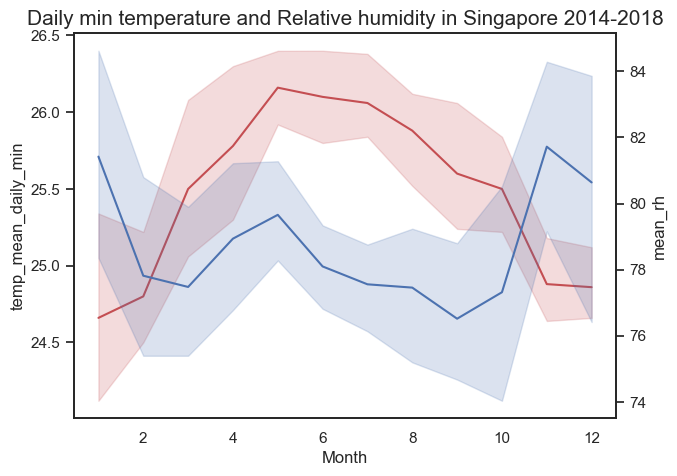

In [78]:
plt.figure(figsize = (7, 5))
sns.lineplot(data=df_final, x='mth',y='temp_mean_daily_min',color="r").set(xlabel='Month')
ax2 = plt.twinx()
sns.lineplot(data=df_final, x='mth', y='mean_rh', color="b", ax=ax2)
plt.title('Daily min temperature and Relative humidity in Singapore 2014-2018', fontsize=15)
plt.savefig('temp_rh', bbox_inches='tight')

## Analysis:

- For the period of analysis, the average daily minimum temperature Singapore falls within the range of 25-26°C and the relative humidity is in between 75% to 83%. 
- The graphs also suggests a possible inverse relationship between temperature and relative humidity.
- From our experiences, the temperature can rise up to 8°C on a typical day in Singapore. This gives the daily temperature range that coincides with the optimum average temperature for mosquito growth (25–30 °C).
- High humidity in Singapore can also lead to favourable habitat for mosquito breedings.

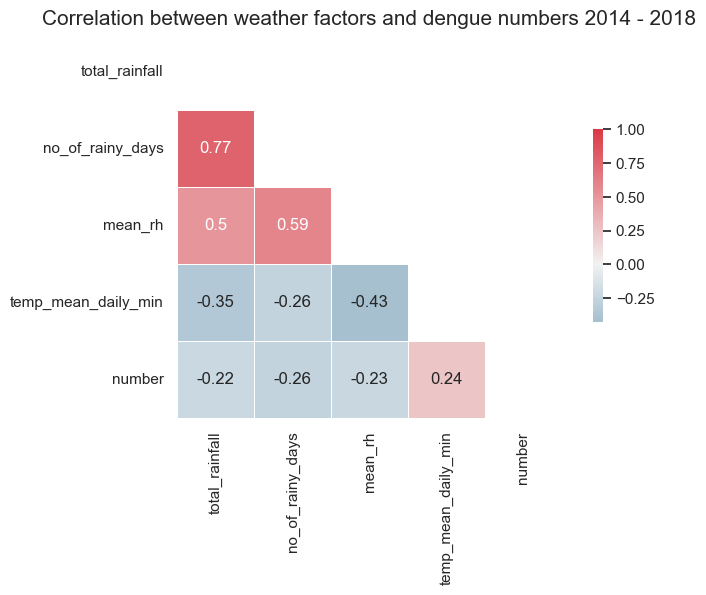

In [79]:
sns.set(style="white")
corr = df_merge.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(235,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
ax.set_title('Correlation between weather factors and dengue numbers 2014 - 2018', fontsize = 15)
plt.savefig('heatmap_fig.png', bbox_inches='tight')

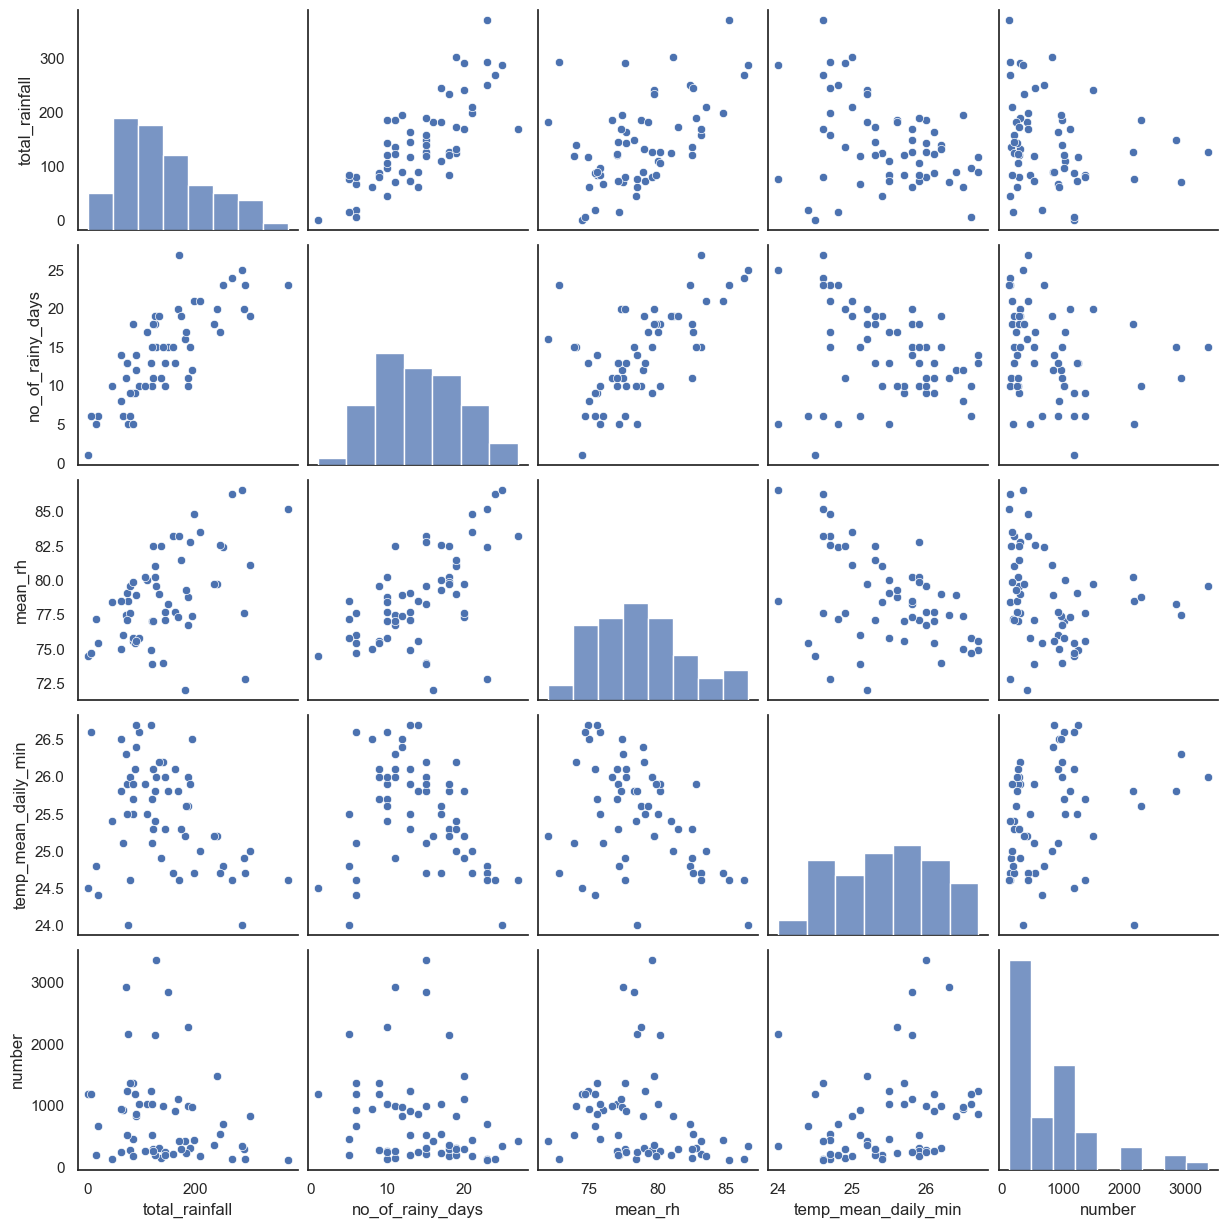

In [80]:
sns.pairplot(df_merge)
plt.show()

## Analysis:

- Taking co-efficient of 0.5as the bench mark here, the heatmap and pairplot above indicate relatively strong positive correlation between any two of the three weather metrics: total rainfall, number of rainy days, and relative humidity. 
- No significant correlation (either positive or negative) between the number of dengue cases to any of the weather metrics. 
- This might be different from what was expected at the beginning of the study. Let's look into the dengue data more carefully.

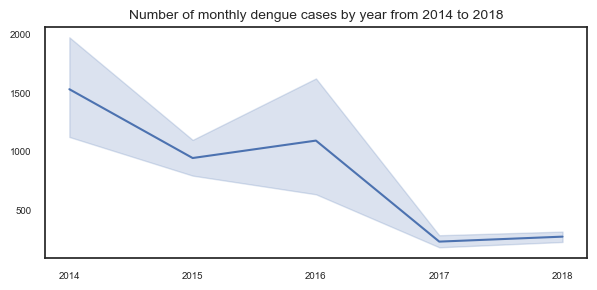

In [81]:
plt.figure(figsize = (7, 3))
sns.lineplot(x='yr', y='number', data=df_final).set(xlabel=None, ylabel=None)
plt.title('Number of monthly dengue cases by year from 2014 to 2018', fontsize = 10)
plt.xticks(ticks = [2014,2015,2016,2017,2018],fontsize = 7)
plt.yticks(fontsize = 7)
plt.savefig('dengue_number.png', bbox_inches='tight')

## Analysis:

- From the lineplot of dengue numbers, it is noticed the dengue case numbers are highly varied in the peiord of study, ranging from 250 cases to 1,500 cases in a month.
- For the period from 2014 to 2018, the overall trend of the case numbers is decreasing, with a small increment from 2015 to 2016.
- A sharp fall of dengue case numbers is observed in year 2017. This may be attributed to three reasons ([Source](https://www.straitstimes.com/singapore/2772-dengue-cases-in-2017-the-lowest-in-the-last-16-years-nea)) :
- First, the local population has built up immunity after a high number of cases in the last few years where there were dengue outbreaks.Second, there was a concerted effort by the community and NEA in response to the Zika outbreak in the second half of 2016.Lastly, NEA's diligent effort in setting up nextwork Gravitraps - traps that catch Aedes aegypti mosquitoes and collect data on them, and conduction of household inspections.

Unfortunately, the downgoing trend may not continue forever. From the dengue case number graph published by Ministry of Health below, that covers a wider timeframe, we see the spikes of case numbers in cycles of 2-3 years and it surged way beyond the historical levels in 2020.

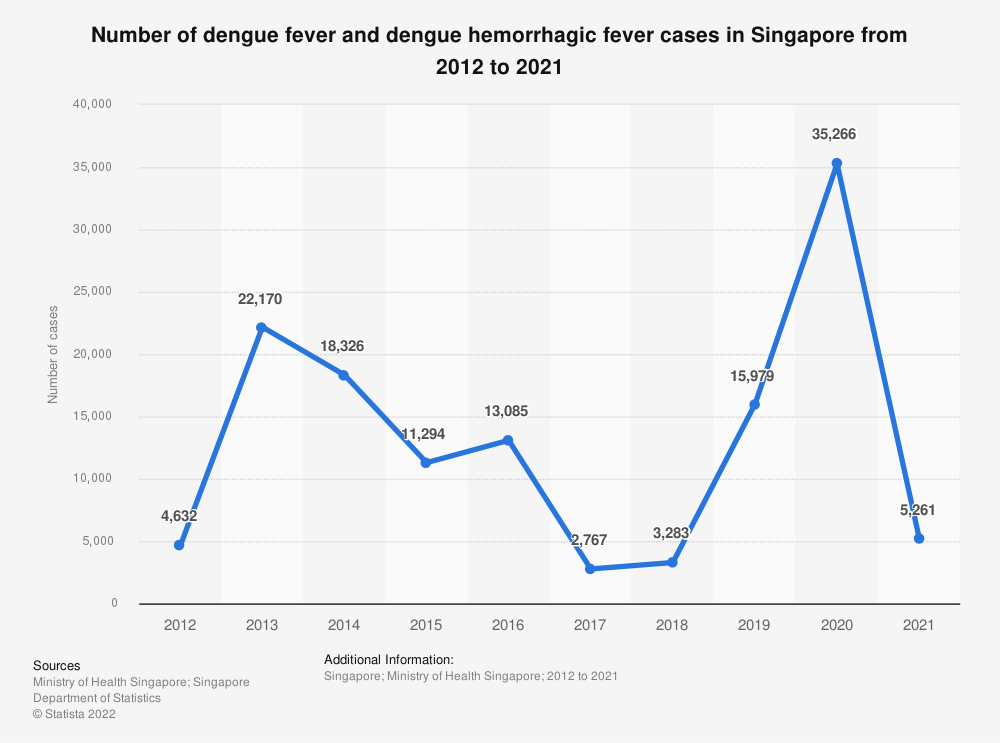
([Picture Source](https://www.statista.com/statistics/963019/number-of-dengue-fever-cases-singapore/))

Due to the drastic turn of data trend at the begining of 2017, it might make sense for me to split the dengue case numbers into two separate periods, before (exluding) 2017 and after (including) 2017 for a closer look into the probable correlations with weather metrics.

In [84]:
df_before2017 = df_merge[0:36]

Text(0.5, 1.0, 'Correlation between weather factors and dengue numbers 2014 - 2016')

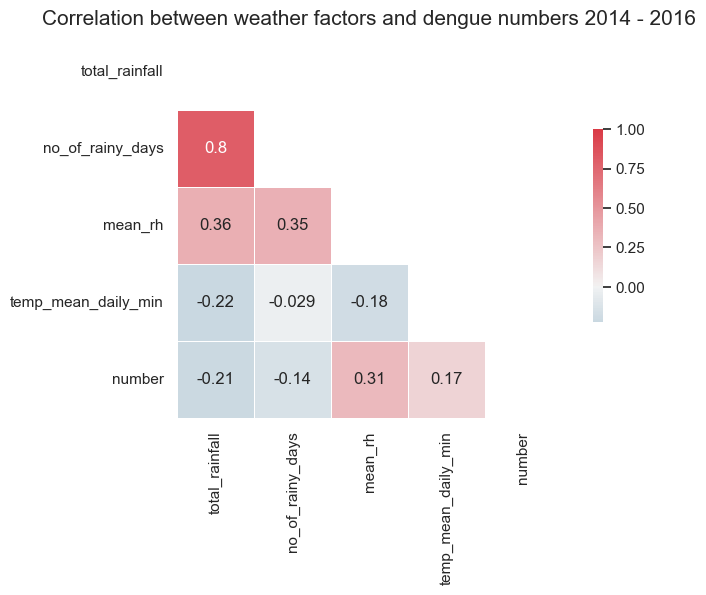

In [85]:
sns.set(style='white')
corr = df_before2017.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(235,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
plt.title('Correlation between weather factors and dengue numbers 2014 - 2016', fontsize = 15)

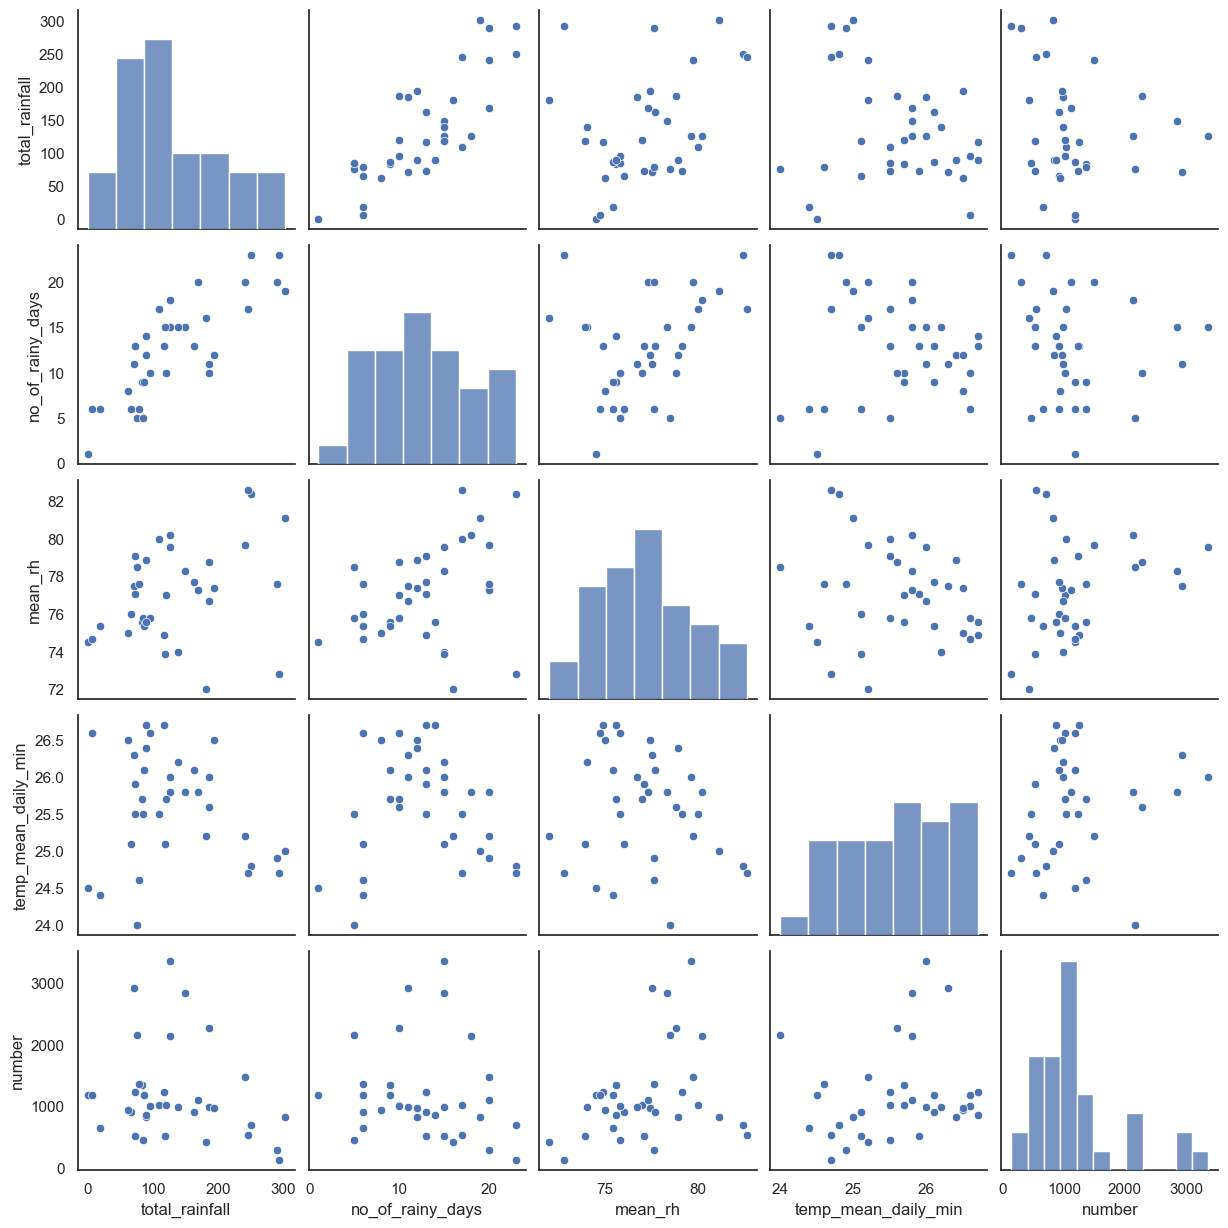

In [86]:
sns.pairplot(df_before2017)
plt.show()

## Analysis:

- After splitting the data, for the period before 2017, heatmap and pairplot show that only the correlation between relative humidity and dengue number improved slightly. The rest even show lower correlation coefficient.
- Still no strong correlation observed between dengue case numbers and any of the weather metrics.

In [87]:
df_after2017 = df_merge[36:]

Text(0.5, 1.0, 'Correlation between weather factors and dengue numbers 2017 - 2018')

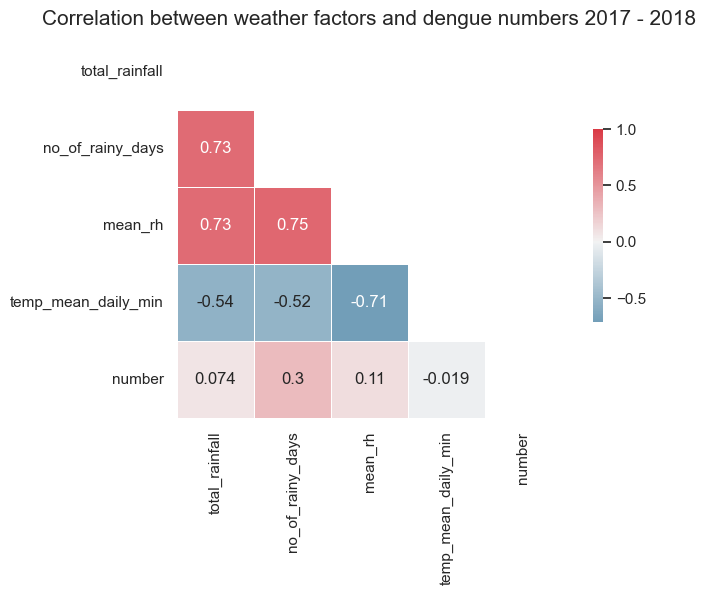

In [88]:
sns.set(style='white')
corr = df_after2017.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(235,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
plt.title('Correlation between weather factors and dengue numbers 2017 - 2018', fontsize = 15)

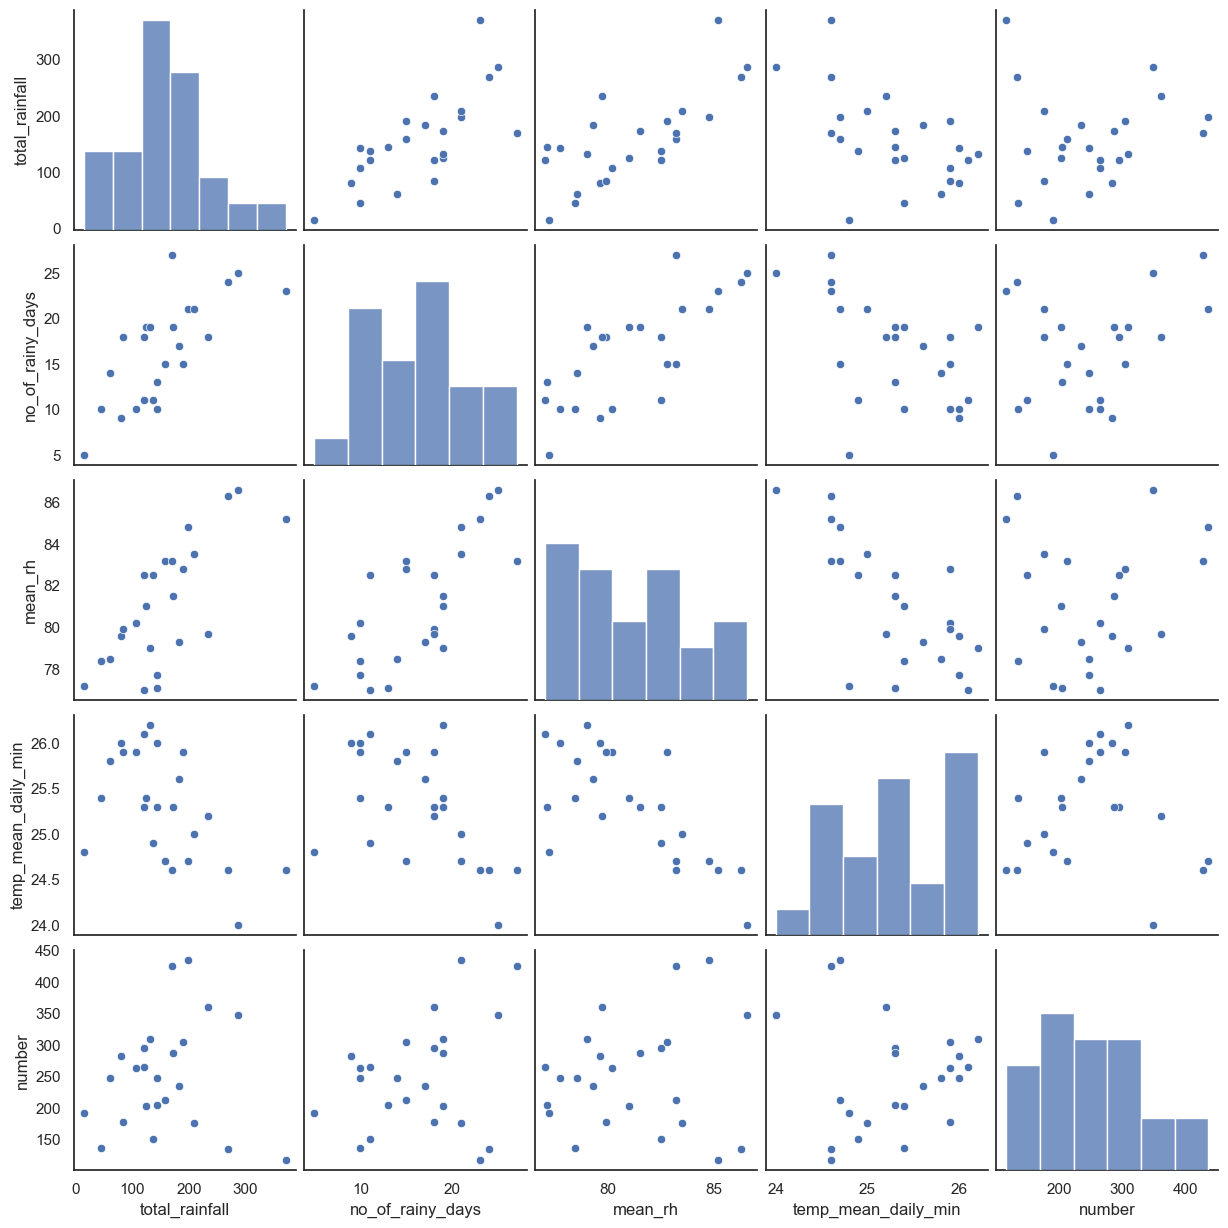

In [89]:
sns.pairplot(df_after2017)
plt.show()

## Analysis:

- For the period of 2017 and 2018, it is interesting to observe a significant change in the correlation between dengue numbers and number of rainy days (from -0.14 to +0.3). That between dengue numbers and total rainfall also inversed from weak negative correlation to weak positive. Surprisingly, that between the dengue numbers and the temperature inversed from weak positive to week negative (which means the dengue cases might fall as temperature increases)!
- And yet no strong correlation observed between dengue case numbers and any of the weather metrics. 
- More investigations are needed to identify the probable reasons for the results.

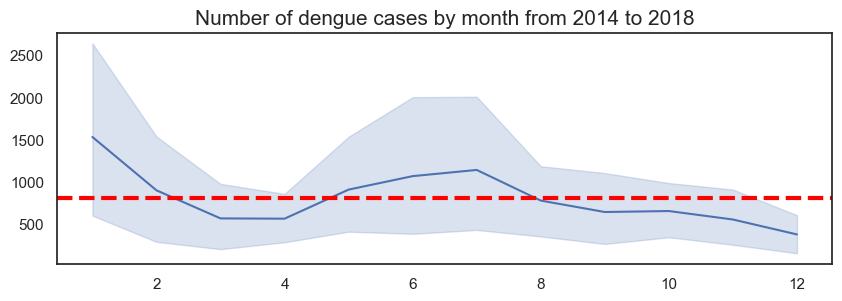

In [90]:
plt.figure(figsize = (10, 3))
sns.lineplot(x='mth', y='number', data=df_merge).set(xlabel=None, ylabel=None)
plt.title('Number of dengue cases by month from 2014 to 2018', fontsize = 15)
plt.axhline(y=df_merge['number'].mean() , color='red', linestyle='--', linewidth=3)

## Analysis:

- Lastly, the above lineplot shows the overall trend of number of dengue cases by month from 2014 to 2018. It seems to suggest there is usually a high number in January, following a sharp fall in February and a slow rise starting from April, until the turning point in June-July period.
- As the earlier studies show weak correlation observed between dengue case numbers and the weather metrics, we might start to think the high number of cases at the beginning of the years to human behaviours, like holiday gatherings during festive seasons. It could be easier for mosquitoes carrying the dengue virus to pass around when more people gather. On the other hand, depending on how the cases are reported, holiday period may cause a delay in the dengue data collection and can be mistaken as a "surge" of case numbers after holidays. 
- Due to the limitation of information available gathered in this study, the spike of 2014 and 2016 cannot be explained at the moment.

Text(0.5, 1.0, 'Number of dengue cases by month from 2014 to 2018')

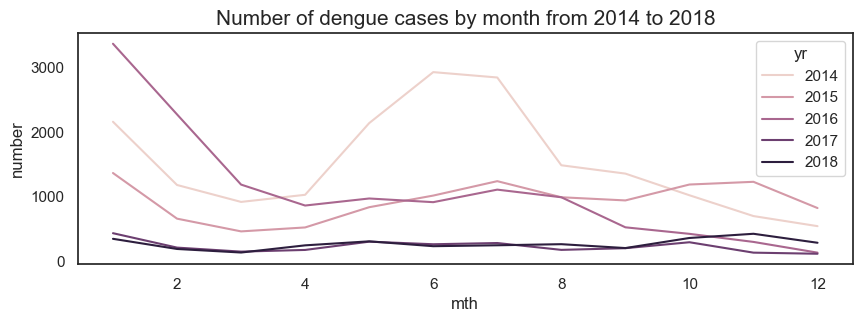

In [91]:
sns.set(style='white')
plt.figure(figsize = (10, 3))
sns.lineplot(data=df_final, x='mth', y='number', hue='yr')
plt.title('Number of dengue cases by month from 2014 to 2018', fontsize = 15)

## Analysis:

- However, if the dengue case numbers are illustrated differently with each year numbers singled out, a huge difference is observed before and after year 2017.
- With cross reference to other years' case numbers (referring to the graph published by NEA below, it is concluded that Jan spike is usual. In general, May to July is the peak period of more dengue cases reported.

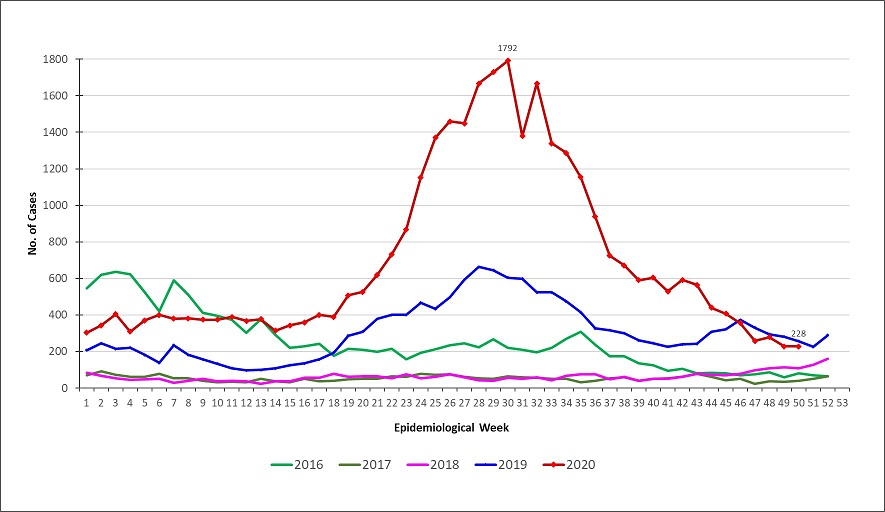
([Picture Source](https://www.nea.gov.sg/media/news/news/index/weekly-dengue-cases-at-the-lowest-in-2020-as-community-rallied-to-fight-dengue-in-historic-outbreak-year))

## Conclusions and Recommendations

Based on the exploration of the datasets, it is observed:

- For the period of analysis, no strong correlation between the cited weather metrics and number of dengue cases observed. Total rainfall, number of rainy days and relative humidity are interdependent.
- Dengue case numbers are highly varied for different years. May to July is seen as the peak season. 
- The weather changes across the months in a year follow a similar pattern for the period of analysis. 


The outcome does not seem to align with the hypothesis raised based on the outside research.

Reasons for such mis-alignment may include:

- **Data Limitations**

  Computation of dengue case numbers: The original dataset of dengue case numbers is based on weekly numbers. The conversion into monthly numbers (without clearly defining the datetime) may lead to inaccurate monthly data. Dengue data will be more reliable if it is collected on a daily basis. 

  On the other hand, a larger dataset of longer period of study, or a wider geographical range beyond Singapore may provide a higher variance in the data for the study.

- **Knowledge Limitations**

  Lagged response (ranged from weeks to months) of dengue cases from weather changes remains unknown. Further studies can be conducted for varied   lagged period, to find out if there is a stronger correlation between dengue case numbers and weather metrics. Alternatively, if any specific lag is scientifically proven, for example we know for sure dengue case numbers only rise within two weeks after certain weather changes, correlation can be shown using dengue data two weeks behind the weather data.

- **Other important factors contributing to the dengue cases beyond the reach of this project**

  Surge of Zika (and other related virus) cases may be related to the dengue case numbers in Singapore.

  Positive outcomes from awareness campaigns and other interference projects can cause significant drop of dengue case numbers within a short span of time.

Due to the limitations of the research findings out of this project, that is no strong correlation has been identified between the cited weather metrics and number of dengue cases reported in Singapore for the period of data analysis, we may advise NEA there is no evidence indicating when is the best period to carry out the awareness campaigns just based on weather predictions. It is important to implement a holistic campaign schedule that sends a strong message across the entire year to the public in order to prevent the surge of dengue cases due to various factors. To be mindful of the usual peak season of dengue cases, step-up effort may be required prior to May to July period.

Dengue "emergency" can be ongoing for Singaporeans. As of the date of concoluding this project, the news says that "More than 30,000 dengue cases reported in 2022, six times that of 2021: NEA". ([Source](https://www.straitstimes.com/singapore/health/more-than-30000-dengue-cases-reported-in-2022-6-times-that-of-2021-nea)) It requires conscious and consistent efforts from not only NEA, but everyone in Singapore to build a healthy dengue-free community.

## References

- ["Singapore’s dengue ‘emergency’ is a climate change omen for the world"](https://edition.cnn.com/2022/06/06/asia/health-dengue-singapore-emergency-climate-heat-intl-hnk/index.html)
- ["Impact of extreme weather on dengue fever infection in four Asian countries: A modelling analysis"](https://www.sciencedirect.com/science/article/pii/S0160412022004457)
- ["The Complex Relationship between Weather and Dengue Virus Transmission in Thailand"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3854883/)
- ["Rise in dengue cases underscores need for constant vigilance"](https://www.ncid.sg/Health-Professionals/Articles/Pages/Rise-in-dengue-cases-underscores-need-for-constant-vigilance.aspx)
- ["Dengue Prevention and 35 Years of Vector Control in Singapore"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3373041/)
- ["NEA Launches National Dengue Prevention Campaign 2022 Early To Urge Immediate Action Against Dengue"](https://www.nea.gov.sg/media/news/news/index/nea-launches-national-dengue-prevention-campaign-2022-early-to-urge-immediate-action-against-dengue)
- ["Weather factors key to ‘predicting’ dengue outbreaks"](https://www.eco-business.com/news/weather-factors-key-to-predicting-dengue-outbreaks/)
- ["2,772 dengue cases in 2017, the lowest in the last 16 years: NEA"](https://www.straitstimes.com/singapore/2772-dengue-cases-in-2017-the-lowest-in-the-last-16-years-nea)
- ["More than 30,000 dengue cases reported in 2022, six times that of 2021: NEA"](https://www.straitstimes.com/singapore/health/more-than-30000-dengue-cases-reported-in-2022-6-times-that-of-2021-nea)